In [5]:
import simpy
import numpy as np
import sys
import pandas as pd
import os
from tqdm import tqdm
import time

from collections import defaultdict


זמן במערכת לכל התחנות יחד 

In [ ]:
# import simpy
# import numpy as np
# from collections import defaultdict

# class Queue_ED:
#     def __init__(self, lamda, num_stations, mu_services, sim_time, arrival_schedule, preload_n):
#         # Defining a simpy environment
#         self.env = simpy.Environment()

#         self.id_customer = 0  # keeping track of customers id
#         self.num_stations = num_stations
#         self.print = False
#         self.servers = []
#         self.mu_services = mu_services
#         self.arrival_schedule = arrival_schedule
#         self.preload_n = preload_n
#         self.end_time = sim_time

#         self.inter_departure = {}
#         self.last_departure_time = {}

#         # ===== time-in-state tracking (system-wide) =====
#         self.state_time = defaultdict(float)   # key: N, value: total time spent with N
#         self.last_state_change_time = 0.0      # last time when N changed
#         self.num_cust_sys = 0                  # number of customers in the system
#         # ==============================================

#         # Create servers + station tracking lists
#         for station in range(num_stations):
#             self.servers.append(simpy.Resource(self.env, capacity=1))
#             self.inter_departure[station] = []
#             self.last_departure_time[station] = []

#         # Preload customers at station 0 (if requested)
#         if preload_n > 0:
#             self.preload_customers_station0(preload_n)

#     def run(self):
#         station = 0
#         self.env.process(self.customer_arrivals(station))
#         self.env.run(until=self.end_time)
#         # close last segment
#         self.accumulate_state_time()

#     def preload_customers_station0(self, n):
#         for _ in range(n):
#             self.id_customer += 1
#             self.accumulate_state_time()
#             self.num_cust_sys += 1
#             self.env.process(self.service(self.id_customer, 0))

#     def accumulate_state_time(self):
#         now = self.env.now
#         dt = now - self.last_state_change_time
#         if dt < 0:
#             raise RuntimeError("Negative dt in accumulate_state_time")

#         self.state_time[self.num_cust_sys] += dt
#         self.last_state_change_time = now

#     #########################################################
#     ###################  Arrival block #######################
#     #########################################################

#     def lam_t(self, t):
#         """Return lambda(t) per hour, repeating every 24 hours."""
#         tau = t % 24
#         for start, end, lam in self.arrival_schedule:
#             if start <= tau < end:
#                 return lam
#         return self.arrival_schedule[-1][2]  # safe fallback

#     def customer_arrivals(self, station):
#         while True:
#             lam_now = self.lam_t(self.env.now)
#             yield self.env.timeout(np.random.exponential(1 / lam_now))

#             self.accumulate_state_time()
#             self.id_customer += 1
#             self.num_cust_sys += 1

#             if self.print:
#                 print(f"Customer {self.id_customer} arrived at time: {self.env.now}")

#             self.env.process(self.service(self.id_customer, station))

#     #########################################################
#     ###################  Service block #######################
#     #########################################################

#     def service(self, id_customer, station):
#         arrival_time = self.env.now  # (not used, but kept)

#         with self.servers[station].request() as req:
#             yield req

#             if self.print:
#                 print(f"Customer {id_customer} start station {station} service at time: {self.env.now}")

#             yield self.env.timeout(np.random.exponential(1 / self.mu_services[station]))

#             if self.print:
#                 print(f"Customer {id_customer} complete station {station} service at time: {self.env.now}")

#         departure_time_station = self.env.now
#         self.last_departure_time[station].append(departure_time_station)

#         if len(self.last_departure_time[station]) >= 2:
#             self.inter_departure[station].append(
#                 self.last_departure_time[station][-1] - self.last_departure_time[station][-2]
#             )

#         if station < self.num_stations - 1:
#             self.env.process(self.service(id_customer, station + 1))
#         else:
#             self.accumulate_state_time()
#             self.num_cust_sys -= 1


# # ---------------- Example usage ----------------
# if __name__ == "__main__":
#     lamda = 0.9  # not used directly (schedule is used), kept for compatibility
#     num_stations = 3
#     mu_services = [1, 1, 1]
#     end_time = 10
#     preload_n = 5
#     arrival_schedule = [
#         (0.0, 4.0, 0.9),
#         (4.0, 12.0, 0.9),
#         (12.0, 24.0, 0.9),
#     ]

#     queue_ED = Queue_ED(lamda, num_stations, mu_services, end_time, arrival_schedule, preload_n)
#     queue_ED.run()

#     state_time = dict(queue_ED.state_time)
#     total_time = sum(state_time.values())
#     prob = {k: v / total_time for k, v in state_time.items()}

#     print("state_time:", state_time)
#     print("sum(prob) :", sum(prob.values()))
#     print("prob     :", prob)


state_time: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 2.288708626089527, 6: 3.5902749307012676, 7: 0.7809534997410177, 8: 2.249566762095692, 9: 1.0904961813724956}
sum(prob) : 1.0
prob     : {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.2288708626089527, 6: 0.35902749307012677, 7: 0.07809534997410177, 8: 0.22495667620956922, 9: 0.10904961813724956}


500 סימולציות 

In [7]:
# dict_prob=[]

# for i in range(500):

#     queue_ED = Queue_ED( num_stations, mu_services, end_time,arrival_schedule,preload_n)
#     queue_ED.run()
#     dict_is_count_time_of_num_of_cus_in_sys=dict(queue_ED.state_time)
#     total_time = sum(dict_is_count_time_of_num_of_cus_in_sys.values())

#     prob_of_num_of_cus_in_sys = {
#         k: v / total_time
#         for k, v in dict_is_count_time_of_num_of_cus_in_sys.items()
#     }
#     dict_prob.append(prob_of_num_of_cus_in_sys)

ממוצע

In [8]:
# prob_of_num_of_cus_in_sys = {
#     k: v / 500
#     for k, v in sum_dict_prob.items()
# }
# prob_of_num_of_cus_in_sys

קצבי הגעה ושירות בהתפלגות גאמה 

In [9]:
import numpy as np

np.random.seed(42)  # לשחזור תוצאות

# -----------------------
# פרמטרים
# -----------------------
N = 100_000  # מספר דוגמאות גדול לסימולציה

# פרמטרים של גאמה לקצב הגעה
k_arrival = 3
theta_arrival = 0.5

# פרמטרים של גאמה לקצב שירות
k_service_1 = 4
theta_service_1 = 0.4

k_service_2 = 5
theta_service_2 = 0.3



# -----------------------
# 2. "מאגר" דוגמאות לסימולציה
# -----------------------
arrival_samples = np.random.gamma(
    shape=k_arrival,
    scale=theta_arrival,
    size=N
)

service_samples_station_1 = np.random.gamma(
    shape=k_service_1,
    scale=theta_service_1,
    size=N
)

service_samples_station_2 = np.random.gamma(
    shape=k_service_2,
    scale=theta_service_2,
    size=N
)

# -----------------------
# הדפסה לדוגמה
# -----------------------

print("\nדוגמה ראשונה מהסימולציה:")
print("קצב הגעה:", arrival_samples[0])
print("קצב שירות תחנה 1:", service_samples_station_1[0])
print("קצב שירות תחנה 2:", service_samples_station_2[0])



דוגמה ראשונה מהסימולציה:
קצב הגעה: 1.7814093312773513
קצב שירות תחנה 1: 2.11013309041394
קצב שירות תחנה 2: 0.8702909998908274


זמן במערכת לכל תחנה בנפרד

In [21]:
class Queue_ED:

    def __init__(self, num_stations, mu_services, sim_time,arrival_schedule,preload_n):

           # Defining a simpy envirment
        self.env = simpy.Environment()
        
        self.id_customer = 0 # keeping track of cusotmers id
        self.num_stations=num_stations
        self.print = False
        self.servers=[]
        self.mu_services=mu_services
        self.counter_arrival=0
        self.arrival_schedule=arrival_schedule
        self.preload_n=preload_n
        self.end_time = sim_time
        self.inter_departure={}
        self.last_departure_time={}
        self.counter_service = [0 for _ in range(self.num_stations)]

        
                # ===== NEW: time-in-state tracking =====
        self.state_specific_time=[dict() for _ in range(num_stations)]
        self.state_time = [defaultdict(float) for _ in range(num_stations)] # זמן של מספר האנשים במערכת בכל תחנה 
        self.last_state_change_time = [0.0 for _ in range(num_stations)]
        self.num_cust_sys = [0 for _ in range(num_stations)]

        # ======================================

        

        for station in range(num_stations):
            self.servers.append(simpy.Resource(self.env, capacity=1))
            self.inter_departure[station]=[]
            self.last_departure_time[station] = []

        if preload_n > 0:
                self.preload_customers_station0(preload_n)

    def run(self):
        self.env.process(self.customer_arrivals(0))
        self.env.process(self.snapshot_each_minute())
        self.env.run(until=self.end_time)
        for station in range(self.num_stations):  # חשוב בשביל לסגור את התחנות האחרנות לקראת סיום הסימוציה שלא הגיעו אליהם לקוחות 
            self.accumulate_state_time(station)




    def preload_customers_station0(self, n):
        for _ in range(n):
            
            self.id_customer += 1
            self.accumulate_state_time(0) 
            
            self.num_cust_sys[0] += 1
            
            self.env.process(self.service(self.id_customer, 0))

    

    def snapshot_each_minute(self):
        t = int(self.env.now)  # 0
        for s in range(self.num_stations):
            self.state_specific_time[s][t] = self.num_cust_sys[s]

        while True:
            yield self.env.timeout(1)

            t = int(self.env.now)  # 0
            if self.env.now > self.end_time:
                break
            
            for s in range(self.num_stations):
                self.state_specific_time[s][t] = self.num_cust_sys[s]
 
        

    
    def accumulate_state_time(self,station):
        now = self.env.now
        dt = now - self.last_state_change_time[station] 
        if dt < 0:
            raise RuntimeError("Negative dt in accumulate_state_time")
        
        self.state_time[station][self.num_cust_sys[station]]+= dt 
        self.last_state_change_time[station] = now 

        

    #########################################################
    ###################  Arrival block ###################### 
    #########################################################

    # ===================== NEW (minimal) =====================
    def lam_t(self, t):
        """Return lambda(t) per hour, repeating every day_len hours."""
        tau = t % 60
        for start, end, lam in self.arrival_schedule:
            if start <= tau < end:
                return lam
        return self.arrival_schedule[-1][2]
  # fallback
    # =========================================================

    def customer_arrivals(self,station):


        while True:
            self.counter_arrival += 1

            lam = arrival_samples[self.counter_arrival]  
            # lam_now = self.lam_t(self.env.now)
            # ===================== NEW (minimal) =====================
            yield self.env.timeout(np.random.exponential(1/lam))
            self.accumulate_state_time(0)
            self.id_customer += 1
            self.num_cust_sys[0] +=1
            if self.print:
                print('Customer {} arrived at time: {}' .format(self.id_customer, self.env.now))

            self.env.process(self.service(self.id_customer,station))

    #########################################################
    ###################  Service block ###################### 
    #########################################################

    def service(self, id_customer,station):
        
        
        ## For tracking the arrival time of customer
        arrival_time = self.env.now

        with self.servers[station].request() as req:
            
            ## Requesting a server
            yield req
            
            if self.print:
                print('Customer {} start station_ {} service  at time: {}' .format(id_customer,station, self.env.now))
            # if server if available service will be granted.

            # Timeout means the time span bewteen a single service

            #exp 
            # yield self.env.timeout(np.random.exponential(1/self.mu_services[station]))
            if station == 0:
                samples = service_samples_station_1
            elif station == 1:
                samples = service_samples_station_2
            else:
                raise ValueError("No samples for this station")
            
            j = self.counter_service[station] % len(samples)
            mu = samples[j]
            self.counter_service[station] += 1
            
            # זמן שירות ~ Exp(mu)
            yield self.env.timeout(np.random.exponential(1.0 / mu))

            if self.print:
                print('Customer {} complete station {} service  at time: {}' .format(id_customer,station ,self.env.now))
                
        departure_time_station = self.env.now
        self.last_departure_time[station].append(departure_time_station)
        if len(self.last_departure_time[station]) >= 2:

            self.inter_departure[station].append(self.last_departure_time[station][-1]-self.last_departure_time[station][-2])

        if station <self.num_stations-1:
            
            self.accumulate_state_time(station)
            self.num_cust_sys[station] -=1
            
            self.accumulate_state_time(station+1)

            self.num_cust_sys[station+1] +=1

            self.env.process(self.service(id_customer,station+1))
            
            
            
        else:
            self.accumulate_state_time(station)
            self.num_cust_sys[station] -=1


#### data 

In [23]:
# מדמה לולאת סימולציה (גמיש לשינוי קצבים ושעות)

num_stations =2
mu_services = [1,1,1]
end_time = 60
preload_n=0
arrival_schedule = [
    (0.0, 30.0, 2),
    (4.0, 60.0, 0.5),
]
queue_ED = Queue_ED( num_stations, mu_services, end_time,arrival_schedule,preload_n)
# שינוי גמיש של שעות/קצבים מבחוץ:
# פורמט: (שעת התחלה, שעת סוף, lambda לשעה) — חוזר כל day_len שעות


queue_ED.run()
dict_is_count_time_of_num_of_cus_in_sys=queue_ED.state_time    # כמה זמן היה 
dict_is_count_specific_time_of_num_of_cus_in_sys=queue_ED.state_specific_time
df = pd.DataFrame({f"station_{s}": queue_ED.state_specific_time[s] for s in range(num_stations)})
print("num_of_customers in each unit if time: \n")


num_of_customers in each unit if time: 



In [24]:
print(sum(dict_is_count_time_of_num_of_cus_in_sys[0].values()), ':   time in the simulation') 

print(dict_is_count_time_of_num_of_cus_in_sys[0])   # אחד נקודה שמונה שש יחידות זמן היה 0 אנשים במערכת בדוגמא זו  
 


60.0 :   time in the simulation
defaultdict(<class 'float'>, {0: 15.77222081092887, 1: 19.580642476861897, 2: 8.873983801440794, 3: 6.838957795955429, 4: 6.1373081391336015, 5: 1.5576924654325168, 6: 1.1272024113340677, 7: 0.1119920989128218})


### 500 simulations  for specific_state_time 

In [ ]:
num_runs = 50000
num_stations = num_stations
# dict_prob[station] = list of probability dicts (one per run)
sum_list = [defaultdict(float) for _ in range(num_stations)]

for i in range(num_runs):

    queue_ED = Queue_ED(num_stations, mu_services, end_time,
                        arrival_schedule, preload_n)
    queue_ED.run()

    # state_time is assumed to be: state_time[station][N] = time
    for station in range(num_stations):
  
        for k, v in queue_ED.state_specific_time[station].items():
            
             sum_list[station][k] +=v   
                
    
        
print("dict is count num of customer in each unit of time: \n")
     


### sum of customer in avg in specific time 

In [163]:


avg_time= [
    {k: v /num_runs for k,v in sum_list[station].items()} for station in range(num_stations)
       
]


### כמות לקוחות ממוצעת בכל זמן בכל תחנה 

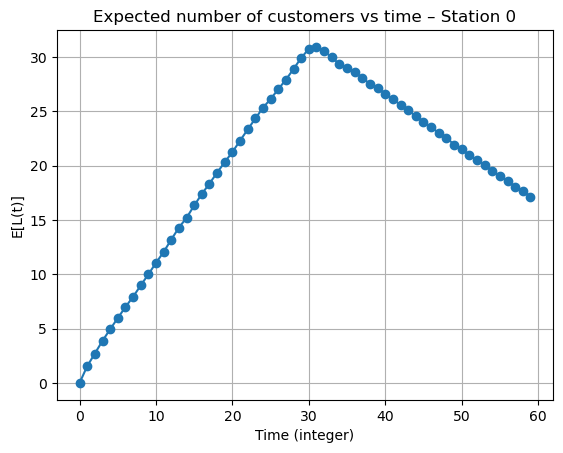

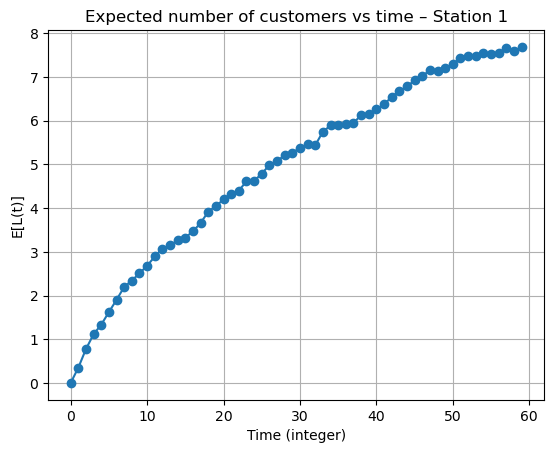

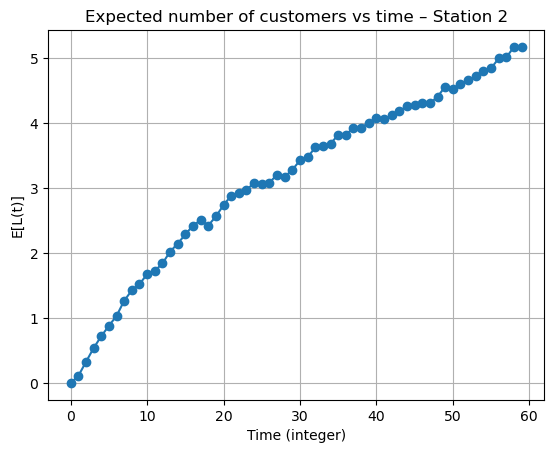

In [164]:
import matplotlib.pyplot as plt
for station in range(num_stations):
    times = avg_time[station].keys()
    values = [avg_time[station][t] for t in times]
    
    plt.plot(times, values, marker='o')
    plt.xlabel("Time (integer)")
    plt.ylabel("E[L(t)]")
    plt.title(f"Expected number of customers vs time – Station {station}")
    plt.grid(True)
    plt.show()


### עכשו אני מייצר מילון שיכיל בתוכו עוד מילון כאשר המילון החיצוני זה היחידת זמן והמילון הפנימי זה מספר הלקוחות וכמות שלהם בכל יחידת זמן 

In [149]:
from collections import defaultdict, Counter
num_runs=500
# --- collect across runs ---
# sum_list[station][time] -> list of num_customers observed at that time over runs
sum_list = [defaultdict(list) for _ in range(num_stations)]

for i in range(num_runs):
    queue_ED = Queue_ED(num_stations, mu_services, end_time, arrival_schedule, preload_n)
    queue_ED.run()

    # assumed: queue_ED.state_specific_time[station][time] = num_customers
    for station in range(num_stations):
        for t, n_cust in queue_ED.state_specific_time[station].items():
            sum_list[station][t].append(n_cust)

# --- convert to: time -> {num_customers -> count} (per station) ---
result = [
    {t: dict(Counter(values)) for t, values in sum_list[station].items()}
    for station in range(num_stations)
]

print(result[0][1], "here was one customer 141 times and 2 customers 56 times" )
result[0]

{1: 165, 0: 255, 2: 56, 3: 19, 4: 3, 5: 2} here was one customer 141 times and 2 customers 56 times


{0: {0: 500},
 1: {1: 165, 0: 255, 2: 56, 3: 19, 4: 3, 5: 2},
 2: {3: 39, 4: 18, 0: 193, 1: 149, 2: 89, 5: 7, 8: 1, 6: 2, 7: 2},
 3: {3: 57, 5: 15, 0: 155, 1: 140, 2: 91, 4: 29, 7: 4, 6: 7, 8: 2},
 4: {3: 71,
  2: 103,
  0: 136,
  4: 38,
  1: 114,
  9: 2,
  5: 19,
  7: 5,
  10: 1,
  6: 8,
  8: 3},
 5: {3: 59,
  4: 54,
  0: 118,
  2: 97,
  1: 113,
  9: 4,
  5: 25,
  6: 15,
  7: 10,
  8: 4,
  11: 1},
 6: {4: 48,
  3: 67,
  0: 120,
  2: 82,
  1: 100,
  12: 2,
  9: 5,
  5: 35,
  7: 14,
  8: 8,
  6: 18,
  11: 1},
 7: {2: 83,
  3: 77,
  6: 18,
  0: 106,
  1: 102,
  12: 2,
  5: 34,
  10: 1,
  9: 7,
  8: 13,
  4: 40,
  7: 17},
 8: {3: 84,
  4: 44,
  5: 35,
  0: 103,
  2: 85,
  11: 1,
  1: 79,
  10: 3,
  7: 25,
  9: 8,
  6: 19,
  8: 13,
  13: 1},
 9: {3: 71,
  5: 38,
  7: 22,
  0: 84,
  2: 87,
  6: 29,
  1: 94,
  12: 2,
  4: 41,
  9: 6,
  8: 18,
  10: 6,
  11: 2},
 10: {1: 99,
  6: 43,
  8: 11,
  0: 77,
  3: 71,
  2: 64,
  12: 3,
  4: 48,
  10: 5,
  5: 45,
  9: 8,
  7: 23,
  11: 1,
  13: 2},
 1

#### מילון שאומר התפלגות של מספר לקוחות בכל יחידת זמן

In [151]:
res=[
    {t: {k: v/sum(values.values())
        for k,v in values.items() } for t, values in result[station].items()}
    for station in range(num_stations)
]


[{0: {0: 1.0},
  1: {1: 0.33, 0: 0.51, 2: 0.112, 3: 0.038, 4: 0.006, 5: 0.004},
  2: {3: 0.078,
   4: 0.036,
   0: 0.386,
   1: 0.298,
   2: 0.178,
   5: 0.014,
   8: 0.002,
   6: 0.004,
   7: 0.004},
  3: {3: 0.114,
   5: 0.03,
   0: 0.31,
   1: 0.28,
   2: 0.182,
   4: 0.058,
   7: 0.008,
   6: 0.014,
   8: 0.004},
  4: {3: 0.142,
   2: 0.206,
   0: 0.272,
   4: 0.076,
   1: 0.228,
   9: 0.004,
   5: 0.038,
   7: 0.01,
   10: 0.002,
   6: 0.016,
   8: 0.006},
  5: {3: 0.118,
   4: 0.108,
   0: 0.236,
   2: 0.194,
   1: 0.226,
   9: 0.008,
   5: 0.05,
   6: 0.03,
   7: 0.02,
   8: 0.008,
   11: 0.002},
  6: {4: 0.096,
   3: 0.134,
   0: 0.24,
   2: 0.164,
   1: 0.2,
   12: 0.004,
   9: 0.01,
   5: 0.07,
   7: 0.028,
   8: 0.016,
   6: 0.036,
   11: 0.002},
  7: {2: 0.166,
   3: 0.154,
   6: 0.036,
   0: 0.212,
   1: 0.204,
   12: 0.004,
   5: 0.068,
   10: 0.002,
   9: 0.014,
   8: 0.026,
   4: 0.08,
   7: 0.034},
  8: {3: 0.168,
   4: 0.088,
   5: 0.07,
   0: 0.206,
   2: 0.17,
   11

#### מילון שאומר התפלגות של מספר לקוחות בכל יחידת זמן כולל השלמה של ערכים של הסתברות שיהיו עד 50 אנשים במערכת 

In [152]:
num_people = 50

res = [
    {
        t: {i: values.get(i, 0) / sum(values.values()) for i in range(num_people + 1)}
        for t, values in result[station].items()
    }
    for station in range(num_stations)
]


### convertion to tensor 

In [153]:
import torch
import numpy as np

num_people = 50

# res = [...]  # מה שאתה כבר יוצר

# הפיכת res למטריצה מלאה
tensor_data = []

for station in res:
    station_rows = []
    for t, dist in station.items():
        row = np.array([dist[i] for i in range(num_people + 1)], dtype=np.float32)
        station_rows.append(row)
    tensor_data.append(station_rows)

tensor = torch.tensor(tensor_data)


tensor([[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.5100, 0.3300, 0.1120,  ..., 0.0000, 0.0000, 0.0000],
         [0.3860, 0.2980, 0.1780,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.4840, 0.1940, 0.1400,  ..., 0.0000, 0.0000, 0.0000],
         [0.4380, 0.2600, 0.1120,  ..., 0.0000, 0.0000, 0.0000],
         [0.4620, 0.2280, 0.1240,  ..., 0.0000, 0.0000, 0.0000]],

        [[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.7960, 0.1920, 0.0120,  ..., 0.0000, 0.0000, 0.0000],
         [0.6400, 0.2760, 0.0740,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.3560, 0.2500, 0.1100,  ..., 0.0000, 0.0000, 0.0000],
         [0.3920, 0.2340, 0.1080,  ..., 0.0000, 0.0000, 0.0000],
         [0.3980, 0.2400, 0.1080,  ..., 0.0000, 0.0000, 0.0000]],

        [[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.9300, 0.0640, 0.0060,  ..., 0.0000, 0.0000, 0.0000],
         [0.7900, 0.1820, 0.0280,  ..., 0.0000, 0.0000, 0.

#### חלוקה של באלקים של קוד כדי להבין אותו 

In [16]:
for station in range(num_stations):
    # כל הזמנים (מסודרים) בתחנה
    times = sorted(res[station].keys())

    # כל מצבי ה-N האפשריים בתחנה (איחוד מכל הזמנים)
    all_n = sorted({n for t in times for n in res[station][t].keys()})
all_n

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

הסבר איך הקוד נראה 

In [63]:
# כל הזמנים (מסודרים) בתחנה
times = sorted(res[0].keys())

# כל מצבי ה-N האפשריים בתחנה (איחוד מכל הזמנים)
all_n = sorted({n for t in times for n in res[0][t].keys()})

plt.figure()
for n in all_n:
    # אם בזמן מסוים אין n, נשים 0
    y = [res[0][t].get(n, 0.0) for t in times]
    print(y,n)

[1.0, 0.494, 0.356, 0.32, 0.29, 0.236, 0.236, 0.22, 0.212, 0.186, 0.198, 0.16, 0.144, 0.152, 0.142, 0.13, 0.136, 0.114, 0.134, 0.124, 0.126, 0.096, 0.108, 0.126, 0.112, 0.088, 0.108, 0.094, 0.094, 0.098, 0.108, 0.12, 0.114, 0.088, 0.088, 0.088, 0.102, 0.086, 0.094, 0.094, 0.108, 0.092, 0.072, 0.066, 0.068, 0.044, 0.062, 0.072, 0.076, 0.07, 0.074, 0.08, 0.066, 0.092, 0.072, 0.074, 0.072, 0.062, 0.066, 0.102] 0
[0.0, 0.348, 0.328, 0.264, 0.2, 0.228, 0.228, 0.202, 0.174, 0.188, 0.154, 0.178, 0.168, 0.168, 0.16, 0.148, 0.128, 0.142, 0.128, 0.138, 0.128, 0.136, 0.12, 0.098, 0.118, 0.128, 0.094, 0.11, 0.092, 0.07, 0.1, 0.096, 0.092, 0.11, 0.088, 0.092, 0.082, 0.088, 0.08, 0.078, 0.078, 0.074, 0.09, 0.094, 0.068, 0.082, 0.076, 0.07, 0.068, 0.084, 0.08, 0.074, 0.078, 0.068, 0.07, 0.062, 0.076, 0.098, 0.07, 0.06] 1
[0.0, 0.11, 0.152, 0.16, 0.196, 0.17, 0.154, 0.148, 0.178, 0.18, 0.136, 0.118, 0.158, 0.122, 0.146, 0.152, 0.134, 0.148, 0.118, 0.12, 0.12, 0.14, 0.112, 0.106, 0.086, 0.096, 0.112, 0

<Figure size 640x480 with 0 Axes>

## ויזואליזאציה של התפלגות לקוחות בכל יחידת זמן בכל תחנה 

### לסדר את הויזאלזיציה ולהראות רק את החמישה הראשוני

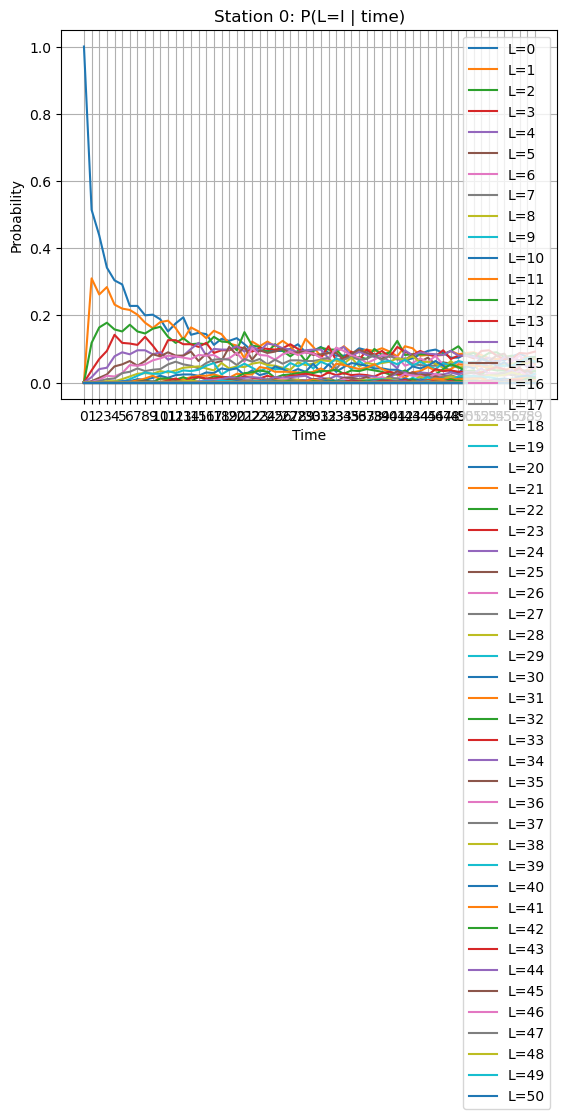

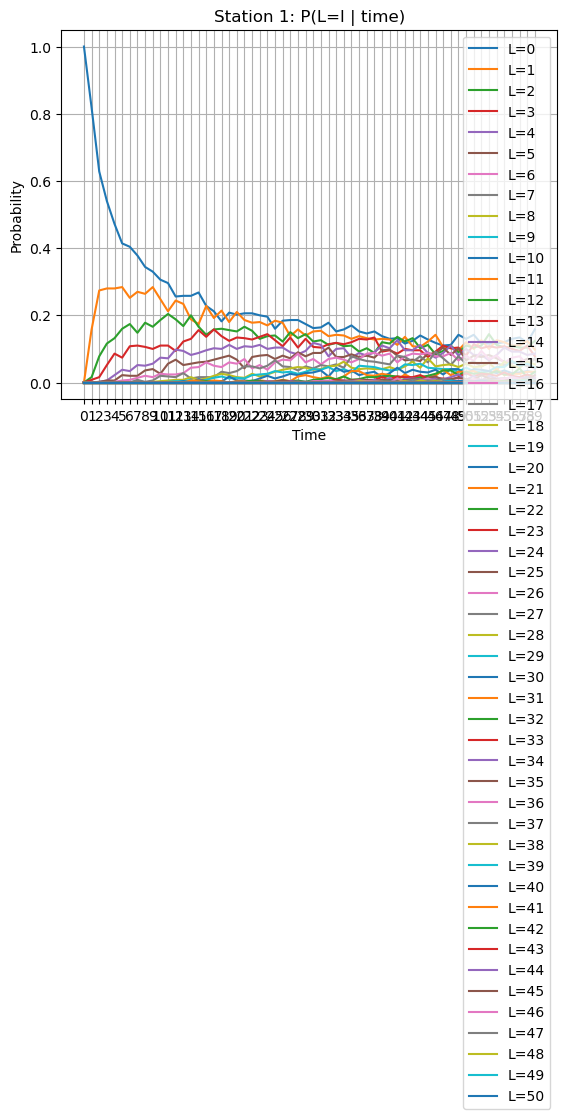

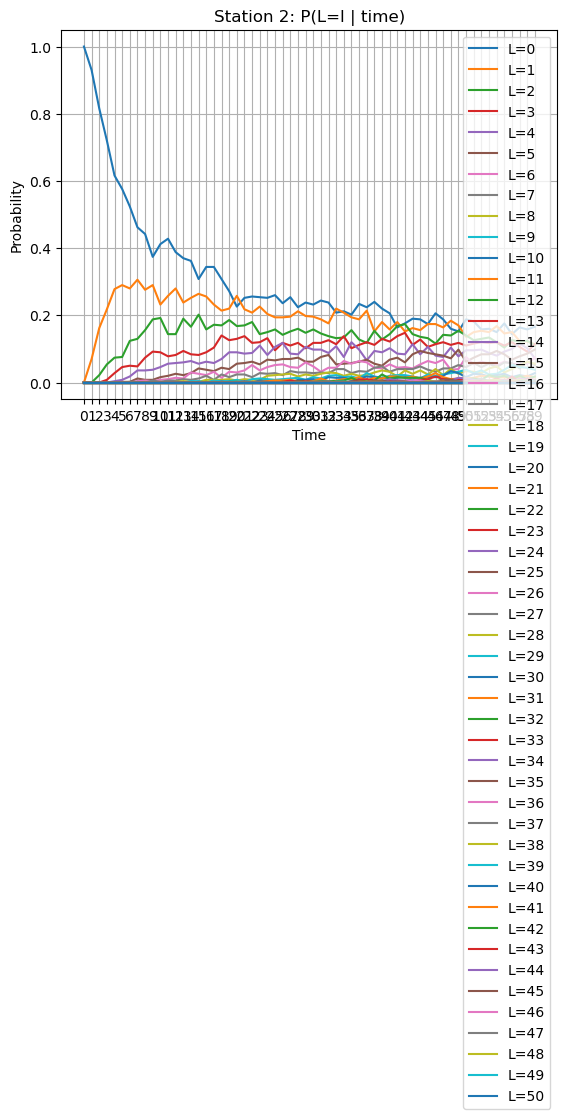

In [18]:
import matplotlib.pyplot as plt

for station in range(num_stations):
    # כל הזמנים (מסודרים) בתחנה
    times = sorted(res[station].keys())

    # כל מצבי ה-N האפשריים בתחנה (איחוד מכל הזמנים)
    all_n = sorted({n for t in times for n in res[station][t].keys()})

    plt.figure()
    for n in all_n:
        # אם בזמן מסוים אין n, נשים 0
        y = [res[station][t].get(n, 0.0) for t in times]
        plt.plot(times, y, label=f"L={n}")

    plt.xlabel("Time")
    plt.ylabel("Probability")
    plt.title(f"Station {station}: P(L=l | time)")
    plt.xticks(times)  # אם יש הרבה זמנים זה יהיה צפוף; אפשר להוריד את השורה הזו
    plt.legend()
    plt.grid(True)
    plt.show()


###  כמה זמן כל כמות לקוחות הייתה בכל תחנה ביחס לאורך הסימולצה 

### 500 simulations  for state_time 

In [ ]:


num_runs = 500
num_stations = num_stations

# dict_prob[station] = list of probability dicts (one per run)
dict_prob = defaultdict(list)

for i in range(num_runs):

    queue_ED = Queue_ED(num_stations, mu_services, end_time,
                        arrival_schedule, preload_n)
    queue_ED.run()

    # state_time is assumed to be: state_time[station][N] = time
    for station in range(num_stations):

             65 = queue_ED.state_time[station]
        total_time = sum(state_time_station.values())

        prob_of_num_of_cus_in_sys = {
            k: v / total_time
            for k, v in state_time_station.items()
        }

        dict_prob[station].append(prob_of_num_of_cus_in_sys)


### ממוצע של זמן כמות לקוחות בכל תחנה 

In [21]:
avg_prob = {}

for station in range(num_stations):
    avg_prob[station] = defaultdict(float)

    for run_dict in dict_prob[station]:
        for k, v in run_dict.items():
            avg_prob[station][k] += v

    for k in avg_prob[station]:
        avg_prob[station][k] /= num_runs
avg_prob

{0: defaultdict(float,
             {0: 0.13399569761288396,
              1: 0.12317451438968956,
              2: 0.10851216088947536,
              3: 0.09355195371927152,
              4: 0.083016176486557,
              5: 0.07447378281937167,
              6: 0.0632271123598066,
              7: 0.0522997031814691,
              8: 0.04364911120578197,
              9: 0.03941170676967886,
              10: 0.03293435871309727,
              11: 0.02811842254534473,
              12: 0.024979517146588394,
              13: 0.02119816601414879,
              14: 0.015412416663394796,
              15: 0.012666563128570861,
              16: 0.010782845857363993,
              17: 0.008431505215092424,
              18: 0.007136345609641798,
              19: 0.0056547338178119235,
              20: 0.004194955568397656,
              21: 0.002775990510947774,
              22: 0.0022316336489093523,
              23: 0.00155345689335514,
              24: 0.0015001783308253394,
  

In [22]:
for station in range(num_stations):
    print(station, sum(avg_prob[station].values()))


0 1.0
1 1.0000000000000002
2 1.0000000000000002



#### probabillity calculation of number of customers in the system

In [23]:
# total_time = sum(dict_is_count_time_of_num_of_cus_in_sys[0].values())

# prob_of_num_of_cus_in_sys = {
#     k: v / total_time
#     for k, v in dict_is_count_time_of_num_of_cus_in_sys[0].items()
# }
# print(prob_of_num_of_cus_in_sys,"\n",
# "the sum of prob is : ",sum(prob_of_num_of_cus_in_sys.values()))

#### Moments calaulation

In [24]:
val=queue_ED.inter_departure
powers_dict={}
for i in range(len(val)):
    x = val[i]
    
    for k in range(1,6):
        powers_dict[f"station_{i}"] = {}
        
        x_k=[v**k for v in x]
        powers_dict[f"station_{i}"][k]= x_k
        # X_k = [v**k for v in x]         # שלב 1
        # powers[f"station_{j}"][k] = X_k

In [25]:
import numpy as np
val=queue_ED.inter_departure

powers = {}   # X^k
moments = {}  # E[X^k]

for j in range(len(val)):              # תחנות
    x =  np.array(val[j])
    
    powers[f"station_{j}"] = {}
    moments[f"station_{j}"] = {}

    for k in range(1, 6):  
        X_k = x**k  # moments 1..5
         # שלב 1
        powers[f"station_{j}"][k] = X_k
        moments[f"station_{j}"][k] = np.mean(X_k)  # שלב 2


In [26]:
moments

{'station_0': {1: 1.0990082908758834,
  2: 2.573970024322145,
  3: 8.11698566004471,
  4: 29.79010405369392,
  5: 119.83516476991846},
 'station_1': {1: 1.3164316837560088,
  2: 3.7880512505930035,
  3: 16.398307636322524,
  4: 85.02287019352941,
  5: 478.131423102003},
 'station_2': {1: 1.3552854436912602,
  2: 4.28385162432683,
  3: 19.955586910627513,
  4: 112.08222612511106,
  5: 687.7820036053481}}

## autocorrelation

$$
\frac{
\operatorname{Cov}\!\left(D_q^{a_1},\, D_{q-k}^{a_2}\right)
}{
\sqrt{
\operatorname{Var}\!\left(D_q^{a_1}\right)\,
\operatorname{Var}\!\left(D_{q-k}^{a_2}\right)
}
}
\;=\;
r(a_1, a_2, k)
$$


In [27]:
import numpy as np

def polynomial_autocorrelation(data, a1=1, a2=1, k=1):
    """
    Computes the polynomial auto-correlation r(a1, a2, k)
    as defined in Sherzer (2025).

    Parameters
    ----------
    data : array-like
        Sequence of inter-departure times (steady-state samples)
        d_1, d_2, ..., d_n
    a1 : int
        Power applied to current observation
    a2 : int
        Power applied to lagged observation
    k : int
        Lag (k >= 1)

    Returns
    -------
    float
        r(a1, a2, k) in [-1, 1]
    """

    data = np.asarray(data)

    if k <= 0:
        raise ValueError("Lag k must be a positive integer.")
    if len(data) <= k:
        raise ValueError("Data length must be larger than lag k.")

    # Build X and Y according to Appendix A
    X = data[k:] ** a1
    Y = data[:-k] ** a2

    # Center the variables
    X_centered = X - X.mean()
    Y_centered = Y - Y.mean()

    # Compute covariance and variances
    covariance = np.mean(X_centered * Y_centered)
    var_X = np.mean(X_centered ** 2)
    var_Y = np.mean(Y_centered ** 2)

    # Numerical safety
    if var_X == 0 or var_Y == 0:
        return 0.0

    return covariance / np.sqrt(var_X * var_Y)


## עשיתי בעזרת ה'צאט 

In [28]:
import pandas as pd

rows = []

# אם חשוב לך סדר תחנות עולה:
for station in sorted(val.keys()):
    x = val[station]  # סדרת הנתונים של התחנה

    for a1 in range(1, 4):
        for a2 in range(1, 4):
            res = polynomial_autocorrelation(x, a1=a1, a2=a2, k=1)
            rows.append({"station": station, "a1": a1, "a2": a2, "result": res})

df = pd.DataFrame(rows)

# טבלה: שורה = תחנה, עמודות = כל (a1,a2)
table = df.pivot(index="station", columns=["a1", "a2"], values="result")

# עמודות שטוחות לקריאות
table.columns = [f"a1={a1},a2={a2}" for (a1, a2) in table.columns]

display(table)  # ב-Jupyter זה הכי נוח


,"a1=1,a2=1","a1=1,a2=2","a1=1,a2=3","a1=2,a2=1","a1=2,a2=2","a1=2,a2=3","a1=3,a2=1","a1=3,a2=2","a1=3,a2=3"
station,,,,,,,,,
0,-0.167384,-0.153638,-0.144682,-0.166771,-0.149570,-0.133631,-0.151963,-0.134397,-0.115806
1,-0.256347,-0.242302,-0.212751,-0.160187,-0.156478,-0.135715,-0.109506,-0.116364,-0.102138
2,0.205597,0.150771,0.119003,0.202068,0.111188,0.057391,0.198683,0.094827,0.032086


In [29]:
# import matplotlib.pyplot as plt

# for key, values in queue_ED.inter_departure.items():
#     plt.figure()
#     plt.hist(values, bins=10,density=True)
#     plt.title(f"Histogram for {key}")
#     plt.xlabel("Value")
#     plt.ylabel("Frequency")
#     plt.show()


In [30]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde

# for key, values in queue_ED.inter_departure.items():
#     values = np.asarray(values, dtype=float)

#     kde = gaussian_kde(values)
#     x = np.linspace(values.min(), values.max(), 500)

#     plt.figure()
#     plt.plot(x, kde(x))
#     plt.title(f"PDF (KDE) – station {key}")
#     plt.xlabel("Value")
#     plt.ylabel("Probability density")
#     plt.show()


In [31]:
# for key, values in val.items():
#     values = np.asarray(values, dtype=float)
#     kde = gaussian_kde(values)
#     x = np.linspace(values.min(), values.max(), 500)

#     plt.figure()
#     plt.hist(values, bins=20, density=True, alpha=0.4)
#     plt.plot(x, kde(x))
#     plt.title(f"PDF – station {key}")
#     plt.xlabel("Value")
#     plt.ylabel("Probability density")
#     plt.show()


## סימולציה 

# input 

In [140]:
import math

def exp_nth_moment(lmbda, n):
    return math.factorial(n) / (lmbda ** n)
arrival_schedule = [
    (0.0, 30.0, 1),
    (30.0, 60.0, 0.5),
]
def lam_t(t):
        """Return lambda(t) per hour, repeating every day_len hours."""
        tau = t % 60
        for start, end, lam in arrival_schedule:
            if start <= tau < end:
                return lam
        

### בניית טנסור לתחנה אחת 

In [142]:

# --- בניית הטנסור ---

end_time = 60
data_matrix = [] # רשימה שתכיל רשימות (כל רשימה פנימית היא שורה של זמן)

preload_n = 0 # ערך דמה

for i in range(end_time):
    t_rate = lam_t(i)
    
    # רשימה זמנית עבור הפיצ'רים של רגע i בלבד
    current_features = []
    
    # 1. הוספת 6 מומנטים של הגעה (Arrival)
    for n in range(1, 7):
        val = exp_nth_moment(t_rate, n)
        current_features.append(val)
        
    # 2. הוספת 6 מומנטים של שירות (Service) - הורדתי את ההערה
    # הנחתי שהקצב הוא 1 לפי ההערה בקוד שלך
    for n in range(1, 7):
        val = exp_nth_moment(1, n) 
        current_features.append(val)
        
    # 3. הוספת המשתנה הנוסף (Preload)
    current_features.append(preload_n)
    
    # בדיקה שיש לנו בדיוק 13 פיצ'רים
    if len(current_features) != 13:
        raise ValueError(f"Error: Expected 13 features, got {len(current_features)}")

    # הוספת השורה למטריצה הכללית
    data_matrix.append(current_features)

# המרה לטנסור של PyTorch
# המימד כרגע הוא (60, 13) כלומר: (TimeSteps, Features)
tensor_input = torch.tensor(data_matrix, dtype=torch.float32)

print(f"Original Shape: {tensor_input.shape}") 

# אם המודל שלך דורש ספציפית (13, 60) ולא (60, 13), מבצעים Transpose:
tensor_transposed = tensor_input.T
print(f"Transposed Shape: {tensor_transposed.shape}")

Original Shape: torch.Size([60, 13])
Transposed Shape: torch.Size([13, 60])


In [128]:
torch.set_printoptions(sci_mode=False)
tensor_input[0]


tensor([    1.0000,     2.0000,     6.0000,    24.0000,   120.0000,   720.0000,
            1.0000,     2.0000,     6.0000,    24.0000,   120.0000,   720.0000,
            0.5000])

# output 

In [158]:

tensor[0]


tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.5100, 0.3300, 0.1120,  ..., 0.0000, 0.0000, 0.0000],
        [0.3860, 0.2980, 0.1780,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.4840, 0.1940, 0.1400,  ..., 0.0000, 0.0000, 0.0000],
        [0.4380, 0.2600, 0.1120,  ..., 0.0000, 0.0000, 0.0000],
        [0.4620, 0.2280, 0.1240,  ..., 0.0000, 0.0000, 0.0000]])